In [1]:
import numpy as np
import pandas as pd
import random
import math

from arms.bernoulli import BernoulliArm
%matplotlib inline

In [2]:
class ThompsonSampler():
    
    def __init__(self, ):
        self.sucesses = []
        self.fails = []

    def initialize(self, n_arms):
        self.sucesses = [1 for col in range(n_arms)]
        self.fails = [1 for col in range(n_arms)]

    def select_arm(self):
        theta_arms = []
        for i in range(len(self.sucesses)):
            theta_arms.append(np.random.beta(self.sucesses[i], self.fails[i]))
        return np.argmax(theta_arms)

    def update(self,chosen_arm, reward):
        self.sucesses[chosen_arm] += reward
        self.fails[chosen_arm] += 1 - reward 

In [3]:
random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
best_arm = np.argmax(means)
print("Best arm is " + str(best_arm))

Best arm is 2


In [4]:
from testing_framework.tests import *

algo = ThompsonSampler()
algo.initialize(n_arms)
results = test_algorithm(algo, arms, 5000, 250)
dataframe = pd.DataFrame(np.array(results).T,columns=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])

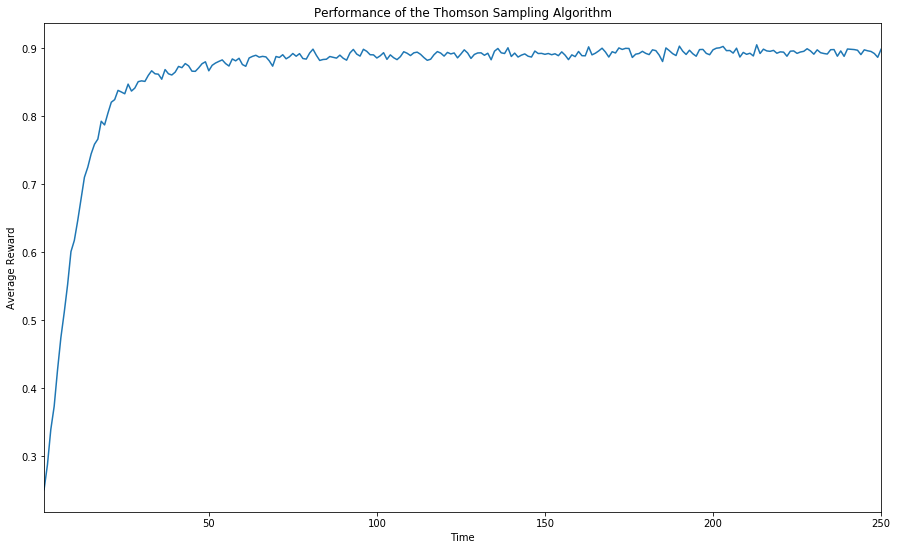

In [8]:
ax = dataframe.groupby("T").mean()['Reward'].plot(figsize=(15,9))
ax.set_title("Performance of the Thomson Sampling Algorithm")
ax.set_ylabel('Average Reward');
ax.set_xlabel('Time');

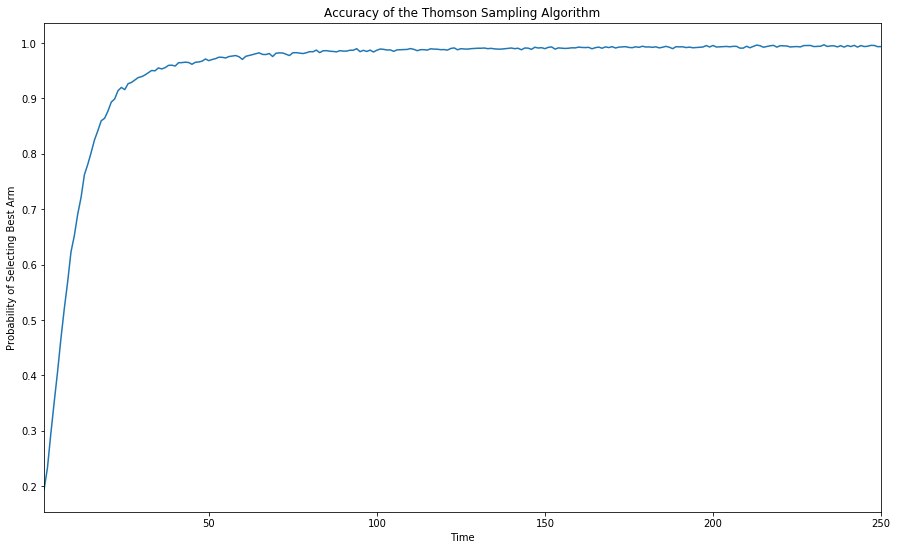

In [6]:
df_grouped = dataframe.groupby(["T","ChosenArm"]).count()/dataframe.Sim.max()
df_grouped = df_grouped.reset_index()
ax = df_grouped[df_grouped['ChosenArm'] == float(best_arm)].set_index('T')['Reward'].plot(figsize=(15,9))
ax.set_title("Accuracy of the Thomson Sampling Algorithm")
ax.set_ylabel('Probability of Selecting Best Arm');
ax.set_xlabel('Time');

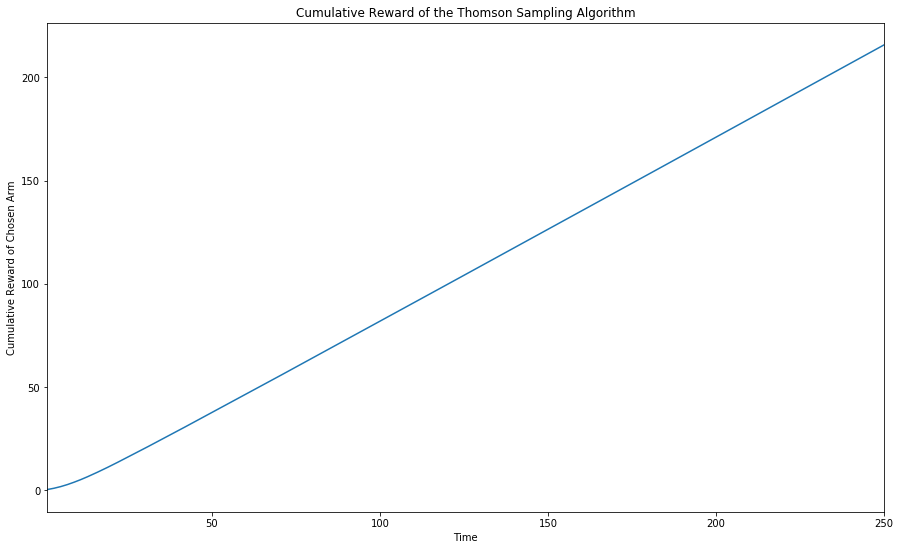

In [7]:
ax = dataframe.groupby("T").mean()['CumulativeReward'].plot(figsize=(15,9))
ax.set_title("Cumulative Reward of the Thomson Sampling Algorithm")
ax.set_ylabel('Cumulative Reward of Chosen Arm');
ax.set_xlabel('Time');

In [ ]:
dataframe.to_csv("Thomson-sampling.csv",index=None)